In [3]:
!pip list | grep -E "pandas|numpy|scikit-learn|joblib|matplotlib"

geopandas                                1.1.1
joblib                                   1.5.2
matplotlib                               3.10.0
matplotlib-inline                        0.2.1
matplotlib-venn                          1.1.2
numpy                                    2.0.2
pandas                                   2.2.2
pandas-datareader                        0.10.0
pandas-gbq                               0.30.0
pandas-stubs                             2.2.2.240909
scikit-learn                             1.6.1
sklearn-pandas                           2.2.0


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = "/content/drive/MyDrive/Projetos"
df_temp = pd.read_excel(f'{path}/data/raw/fraud_data.xlsx')

In [7]:
df_temp.head()

,"trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud"
0,"04-01-2019 00:58,""""""Stokes, Christiansen and S..."
1,"04-01-2019 15:06,Predovic Inc,shopping_net,966..."
2,"04-01-2019 22:37,Wisozk and Sons,misc_pos,49.6..."
3,"04-01-2019 23:06,Murray-Smitham,grocery_pos,29..."
4,"04-01-2019 23:59,Friesen Lt,health_fitness,18...."


In [9]:
df_temp.shape

(14446, 1)

In [8]:
import io

original_column_name = df_temp.columns[0]
csv_data_rows = df_temp[original_column_name]
csv_content = original_column_name + '\n' + '\n'.join(csv_data_rows)

df = pd.read_csv(io.StringIO(csv_content))

df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


In [10]:
print(f"Shape: {df.shape}")
print(f"Colunas: {df.columns.tolist()}")

Shape: (14446, 15)
Colunas: ['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat', 'merch_long', 'is_fraud']


In [11]:
print(f"Tipos de dados:\n{df.dtypes}")

Tipos de dados:
trans_date_trans_time     object
merchant                  object
category                  object
amt                      float64
city                      object
state                     object
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
merch_lat                float64
merch_long               float64
is_fraud                  object
dtype: object


In [12]:
print(f"Valores nulos:\n{df.isnull().sum()}")

Valores nulos:
trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [13]:
print(f"Duplicados: {df.duplicated().sum()}")

Duplicados: 63


In [14]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(14446, 15)
(14383, 15)


In [15]:
df.describe()

,amt,lat,long,city_pop,merch_lat,merch_long
count,14383.000000,14383.000000,14383.000000,1.438300e+04,14383.000000,14383.000000
mean,122.719068,39.761571,-110.835395,1.063921e+05,39.761755,-110.836186
std,228.879064,5.266532,12.877931,2.900439e+05,5.309190,12.887765
min,1.000000,20.027100,-165.672300,4.600000e+01,19.032689,-166.670685
25%,11.945000,36.715400,-120.282400,4.930000e+02,36.768908,-120.095775
50%,51.290000,39.666200,-111.098500,1.645000e+03,39.613766,-111.203646
75%,100.140000,41.940400,-101.136000,3.543900e+04,42.275391,-100.556920
max,3261.470000,66.693300,-89.628700,2.383912e+06,67.510267,-88.646366


### Tratamento de colunas categoricas

In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols.tolist())

['trans_date_trans_time', 'merchant', 'category', 'city', 'state', 'job', 'dob', 'trans_num', 'is_fraud']


In [17]:
for col in categorical_cols:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} categorias únicas")

trans_date_trans_time: 12126 categorias únicas
merchant: 693 categorias únicas
category: 14 categorias únicas
city: 176 categorias únicas
state: 13 categorias únicas
job: 163 categorias únicas
dob: 187 categorias únicas
trans_num: 14383 categorias únicas
is_fraud: 4 categorias únicas


In [18]:
df['is_fraud'].value_counts()

,count
is_fraud,
0,12600
1,1781
"1""2020-12-24 16:56:24""",1
"0""2019-01-01 00:00:44""",1


Remoção de dados categóricos do target

In [21]:
df_2 = df[df['is_fraud'].astype(str).str.strip().isin(['0', '1'])]
df_2['is_fraud'].value_counts(), df_2.shape

(is_fraud
 0    12600
 1     1781
 Name: count, dtype: int64,
 (14381, 15))

In [22]:
df = df_2

In [18]:
def check_date_format(df, column_name, date_format):
    invalid_dates = []
    for index, date_str in df[column_name].items():
        try:
            pd.to_datetime(date_str, format=date_format)
        except ValueError:
            invalid_dates.append((index, date_str))
    return invalid_dates

date_format = '%d-%m-%Y %H:%M'
invalid_entries = check_date_format(df, 'trans_date_trans_time', date_format)

if invalid_entries:
    print(f"Found {len(invalid_entries)} entries in 'trans_date_trans_time' that do not match the format '{date_format}':")
    for index, date_str in invalid_entries:
        print(f"Row {index}: '{date_str}'")
else:
    print(f"All entries in 'trans_date_trans_time' match the format '{date_format}'.")

All entries in 'trans_date_trans_time' match the format '%d-%m-%Y %H:%M'.


In [36]:
def preprocess_categorical_features(df):
    df_processed = df.copy()

    df_processed['is_fraud'] = pd.to_numeric(df_processed['is_fraud'])

    # Tratamento de dados temporais
    df_processed['trans_date_trans_time'] = pd.to_datetime(df_processed['trans_date_trans_time'], format='%d-%m-%Y %H:%M')
    df_processed['hour'] = df_processed['trans_date_trans_time'].dt.hour
    df_processed['day_of_week'] = df_processed['trans_date_trans_time'].dt.dayofweek
    df_processed['month'] = df_processed['trans_date_trans_time'].dt.month
    df_processed.drop('trans_date_trans_time', axis=1, inplace=True)

    # Data de nascimento -> idade
    df_processed['dob'] = pd.to_datetime(df_processed['dob'], dayfirst=True)
    df_processed['age'] = (pd.to_datetime('today') - df_processed['dob']).dt.days // 365
    df_processed.drop('dob', axis=1, inplace=True)

    # Remove ID da transação
    df_processed.drop('trans_num', axis=1, inplace=True)

    # One-Hot Encoding
    category_dummies = pd.get_dummies(df_processed['category'], prefix='cat')
    state_dummies = pd.get_dummies(df_processed['state'], prefix='state')
    df_processed = pd.concat([df_processed, category_dummies, state_dummies], axis=1)
    df_processed.drop(['category', 'state'], axis=1, inplace=True)

    # Target Encoding para categorias com muitas opções
    for col in ['merchant', 'city', 'job']:
        target_mean = df_processed.groupby(col)['is_fraud'].mean()
        df_processed[f'{col}_target_enc'] = df_processed[col].map(target_mean)

        # Preencher NaN (categorias novas) com média global
        global_mean = df_processed['is_fraud'].mean()
        df_processed[f'{col}_target_enc'].fillna(global_mean, inplace=True)

        df_processed.drop(col, axis=1, inplace=True)

    bool_columns = df_processed.select_dtypes(include=['bool']).columns
    df_processed[bool_columns] = df_processed[bool_columns].astype(int)

    return df_processed

In [37]:
df_processed = preprocess_categorical_features(df)

/tmp/ipython-input-3223367322.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[f'{col}_target_enc'].fillna(global_mean, inplace=True)
/tmp/ipython-input-3223367322.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [38]:
df_processed.head()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour,day_of_week,month,...,state_MO,state_NE,state_NM,state_OR,state_UT,state_WA,state_WY,merchant_target_enc,city_target_enc,job_target_enc
0,14.37,64.7556,-165.6723,145,65.654142,-164.722603,1,0,4,1,...,0,0,0,0,0,0,0,0.100000,0.15625,0.15625
1,966.11,64.7556,-165.6723,145,65.468863,-165.473127,1,15,4,1,...,0,0,0,0,0,0,0,0.291667,0.15625,0.15625
2,49.61,64.7556,-165.6723,145,65.347667,-165.914542,1,22,4,1,...,0,0,0,0,0,0,0,0.142857,0.15625,0.15625
3,295.26,64.7556,-165.6723,145,64.445035,-166.080207,1,23,4,1,...,0,0,0,0,0,0,0,0.342105,0.15625,0.15625
4,18.17,64.7556,-165.6723,145,65.447094,-165.446843,1,23,4,1,...,0,0,0,0,0,0,0,0.153846,0.15625,0.15625


In [43]:
df = df_processed.copy()

#### Distribuição de fraudes

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
print(df['is_fraud'].value_counts())
print(f"Taxa de fraude: {df['is_fraud'].mean():.2%}")

plt.figure(figsize=(10, 6))

is_fraud
0    12600
1     1781
Name: count, dtype: int64
Taxa de fraude: 12.38%


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

#### Gráfico da distribuição de fraudes

Text(0.5, 1.0, 'Distribuição de Fraudes')

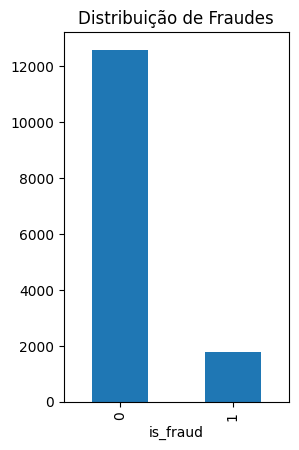

In [45]:
plt.subplot(1, 2, 1)
df['is_fraud'].value_counts().plot(kind='bar')
plt.title('Distribuição de Fraudes')


#### Valor médio das transações por fraude

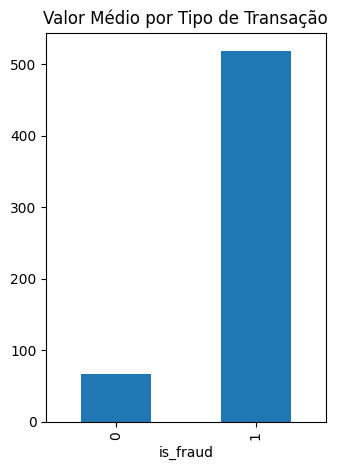

In [46]:
plt.subplot(1, 2, 2)
df.groupby('is_fraud')['amt'].mean().plot(kind='bar')
plt.title('Valor Médio por Tipo de Transação')
plt.tight_layout()
plt.show()

#### Análise do valor das transações

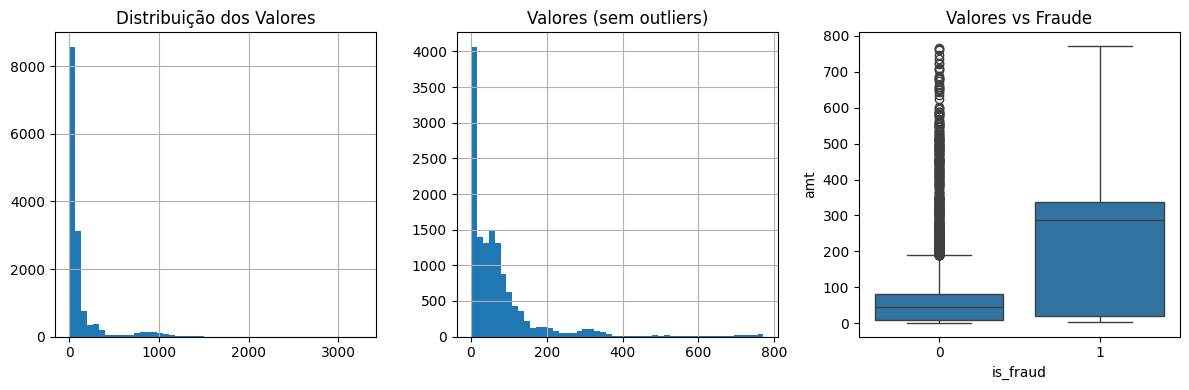

In [47]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
df['amt'].hist(bins=50)
plt.title('Distribuição dos Valores')

plt.subplot(1, 3, 2)
df[df['amt'] < df['amt'].quantile(0.95)]['amt'].hist(bins=50)
plt.title('Valores (sem outliers)')

plt.subplot(1, 3, 3)
sns.boxplot(x='is_fraud', y='amt', data=df[df['amt'] < df['amt'].quantile(0.95)])
plt.title('Valores vs Fraude')
plt.tight_layout()
plt.show()

#### Matriz de correlação para variáveis numéricas

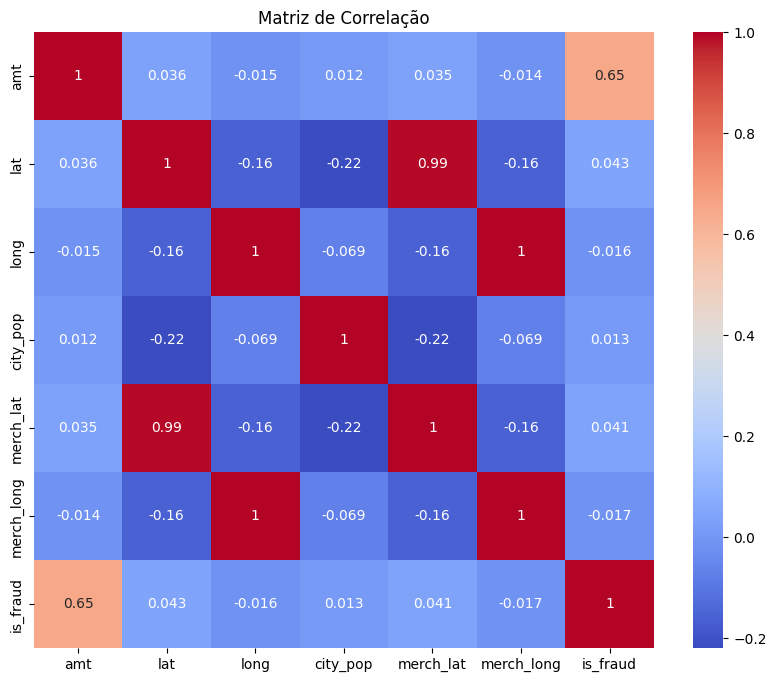

In [48]:
numeric_cols = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols + ['is_fraud']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Preparar datasets de treino e teste

In [49]:
X, y = df.drop('is_fraud', axis=1), df['is_fraud']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
import os

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

processed_path = os.path.join(path, 'processed')

os.makedirs(processed_path, exist_ok=True)

df_train.to_csv(os.path.join(processed_path, 'df_train.csv'), index=False)
df_test.to_csv(os.path.join(processed_path, 'df_test.csv'), index=False)

print(f"df_train.csv saved to: {os.path.join(processed_path, 'df_train.csv')}")
print(f"df_test.csv saved to: {os.path.join(processed_path, 'df_test.csv')}")

df_train.csv saved to: /content/drive/MyDrive/Projetos/processed/df_train.csv
df_test.csv saved to: /content/drive/MyDrive/Projetos/processed/df_test.csv


In [56]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [58]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinamento

In [52]:
model = LogisticRegression(random_state=42)

In [59]:
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [61]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)

In [62]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3734   37]
 [ 175  369]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3771
           1       0.91      0.68      0.78       544

    accuracy                           0.95      4315
   macro avg       0.93      0.83      0.87      4315
weighted avg       0.95      0.95      0.95      4315



In [65]:
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score:", auc_score)

AUC Score: 0.8342485512502534


In [66]:
import joblib

In [67]:
joblib.dump(model, os.path.join(path, 'models/model.pkl'))
joblib.dump(scaler, os.path.join(path, 'models/scaler.pkl'))

['/content/drive/MyDrive/Projetos/models/scaler.pkl']